In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.0 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751508 sha256=edb6bd7c20431474e176638fa5d96e54d359aa94b0e1a55251c10964954051bb
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

%matplotlib inline
file = '/content/winterriver_01CC002_Q_model.xlsx'
raw_data = pd.read_excel(file)
df = raw_data.copy()
df=df[["Date","Level(m)","Flow(m3/s)","Mean Temp (°C)"]][0:1826]
df.head()

,Date,Level(m),Flow(m3/s),Mean Temp (°C)
0,2015-01-01,1.245,1.37,-9.3
1,2015-01-02,1.244,1.37,-7.1
2,2015-01-03,1.230,1.27,-14.0
3,2015-01-04,1.231,1.28,-2.8
4,2015-01-05,1.249,1.40,-4.6


In [ ]:
#print("Highest allowed",df['Level(m)'].mean() + 3*df['Level(m)'].std())
#print("Lowest allowed",df['Level(m)'].mean() - 3*df['Level(m)'].std())

In [ ]:
#new_df=df[(df['Level(m)'] > 0.997) | (df['Level(m)'] < 0.299)]

In [ ]:
#new_df

In [ ]:
#upper_limit = df['Level(m)'].mean() + 3*df['Level(m)'].std()
#lower_limit = df['Level(m)'].mean() - 3*df['Level(m)'].std()

In [ ]:
#df['Level(m)'] = np.where(
#    df['Level(m)']>upper_limit,
#    upper_limit,
#    np.where(
#        df['Level(m)']<lower_limit,
#        lower_limit,
#        df['Level(m)']
#    )
#)

In [ ]:
#df['Level(m)'].describe()

In [ ]:
#df.tail()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [8,6]


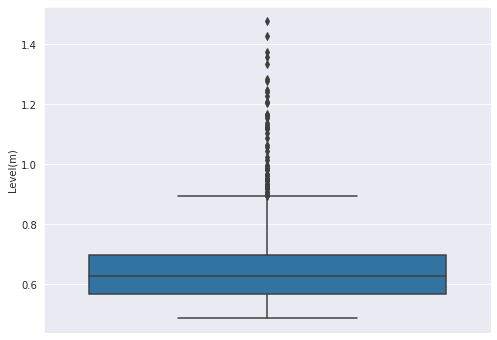

In [ ]:
sns.boxplot( y='Level(m)', data=df)

In [ ]:
q3 = df["Level(m)"].quantile(0.75)  
q1 = df["Level(m)"].quantile(0.25)
print(q3)
print(q1)

0.698
0.567


In [ ]:
IQR = q3 - q1
print(IQR)

0.131


In [ ]:
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

0.37049999999999994
0.8945


In [ ]:
tips_outliers = np.where(df["Level(m)"] > upper_limit, True,
                np.where(df["Level(m)"] < lower_limit, True, False))

In [ ]:
tips_without_outliers = df.loc[~(tips_outliers)]

In [ ]:
print(df.shape)
print(tips_without_outliers.shape)

(1826, 4)
(1764, 4)


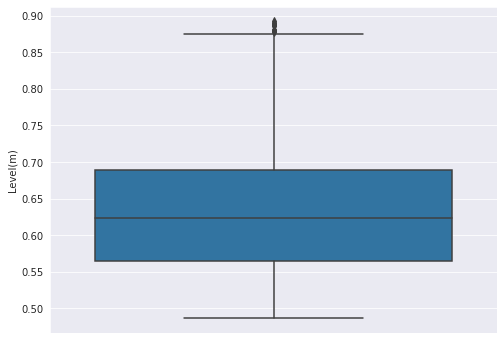

In [ ]:
sns.boxplot( y='Level(m)', data=tips_without_outliers)

In [ ]:
df["Level(m)"] = np.where(df["Level(m)"]> upper_limit,df["Level(m)"].mean(),
                        np.where(df["Level(m)"]< lower_limit, df["Level(m)"].mean(),
                          df["Level(m)"]))

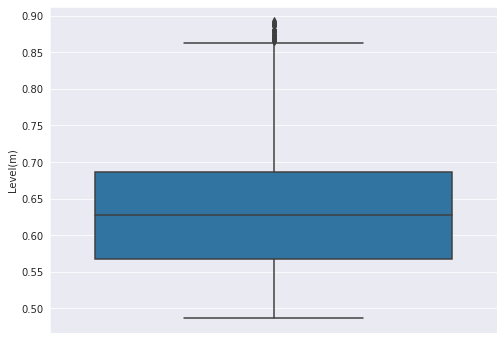

In [ ]:
sns.boxplot( y="Level(m)", data=df)

In [ ]:

df = df.rename(columns={'Level(m)': 'y', 'Date':'ds'})
df.set_index('ds')

,y,Flow(m3/s),Mean Temp (°C)
ds,,,
2015-01-01,1.245,1.370,-9.3
2015-01-02,1.244,1.370,-7.1
2015-01-03,1.230,1.270,-14.0
2015-01-04,1.231,1.280,-2.8
2015-01-05,1.249,1.400,-4.6
...,...,...,...
2019-12-27,1.331,1.070,-4.7
2019-12-28,1.335,1.100,-0.3
2019-12-29,1.323,1.030,-3.2


In [ ]:
df.head()

,ds,y,Flow(m3/s),Mean Temp (°C)
0,2015-01-01,1.245,1.37,-9.3
1,2015-01-02,1.244,1.37,-7.1
2,2015-01-03,1.230,1.27,-14.0
3,2015-01-04,1.231,1.28,-2.8
4,2015-01-05,1.249,1.40,-4.6


In [ ]:
df_train=df[0:1096]
df_train

,ds,y,Flow(m3/s),Mean Temp (°C)
0,2015-01-01,1.245,1.370,-9.3
1,2015-01-02,1.244,1.370,-7.1
2,2015-01-03,1.230,1.270,-14.0
3,2015-01-04,1.231,1.280,-2.8
4,2015-01-05,1.249,1.400,-4.6
...,...,...,...,...
1091,2017-12-27,1.112,0.113,-10.0
1092,2017-12-28,1.091,0.100,-14.9
1093,2017-12-29,1.077,0.092,-10.0
1094,2017-12-30,1.071,0.090,-13.1


In [ ]:
df_test=df[1096:]
df_test

,ds,y,Flow(m3/s),Mean Temp (°C)
1096,2018-01-01,1.065,0.088,-13.9
1097,2018-01-02,1.063,0.087,-14.5
1098,2018-01-03,1.057,0.087,-11.7
1099,2018-01-04,1.051,0.086,0.6
1100,2018-01-05,1.084,0.086,-4.2
...,...,...,...,...
1821,2019-12-27,1.331,1.070,-4.7
1822,2019-12-28,1.335,1.100,-0.3
1823,2019-12-29,1.323,1.030,-3.2
1824,2019-12-30,1.318,0.997,-2.1


In [ ]:
from fbprophet import Prophet

In [ ]:
model= Prophet()
model.add_regressor('Flow(m3/s)')
model.add_regressor('Mean Temp (°C)')
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model

In [ ]:
future_dates=model.make_future_dataframe(periods=0)

In [ ]:
ff=future_dates[1096:]

In [ ]:
#df = df.rename(columns={'meantemp': 'y', 'date':'ds'})
future_data=df[['ds', 'Flow(m3/s)',"Mean Temp (°C)"]]

In [ ]:
forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1821,2019-12-27,1.337354,1.306778,1.370744
1822,2019-12-28,1.343070,1.311766,1.375386
1823,2019-12-29,1.332527,1.298374,1.364451
1824,2019-12-30,1.329830,1.300706,1.364226
1825,2019-12-31,1.325228,1.293966,1.356861


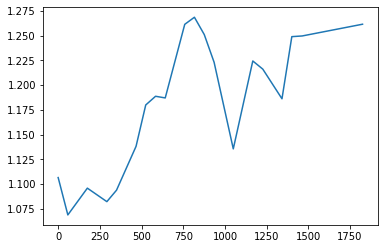

In [ ]:
#forecast_data.head()
forecast_data["trend"].plot()
plt.show()


In [ ]:
df1=pd.Series(forecast_data["trend"])
df1.to_csv('trend_winterriver.csv')

In [ ]:
print(df1)

0       0.457989
1       0.458067
2       0.458145
3       0.458223
4       0.458301
          ...   
1821    0.533976
1822    0.534046
1823    0.534117
1824    0.534187
1825    0.534258
Name: trend, Length: 1826, dtype: float64


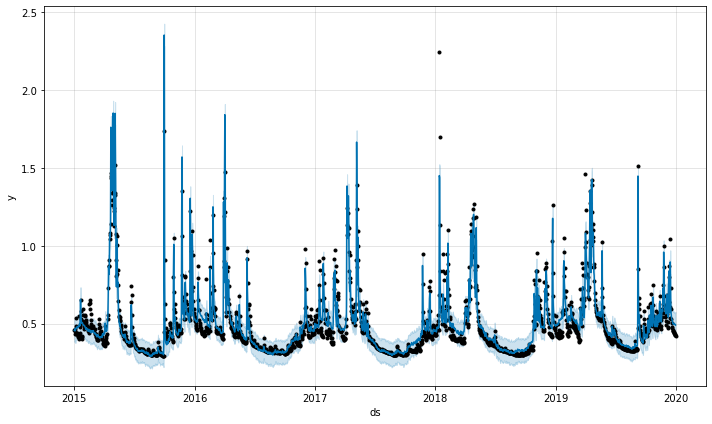

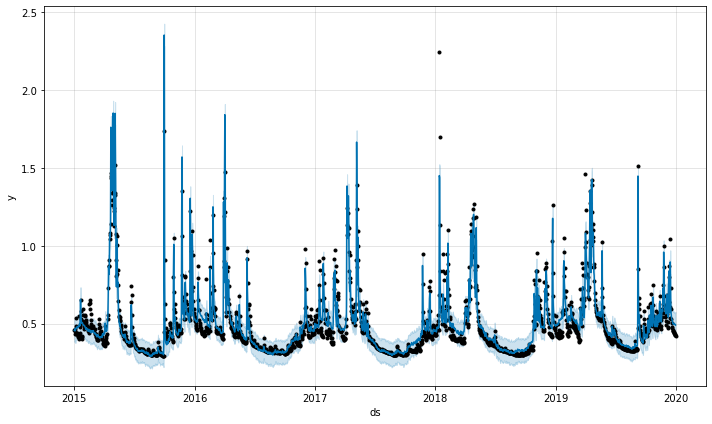

In [ ]:
#from matplotlib.pylab import rcParams
#plt.style.use('seaborn')
model.plot(forecast_data)

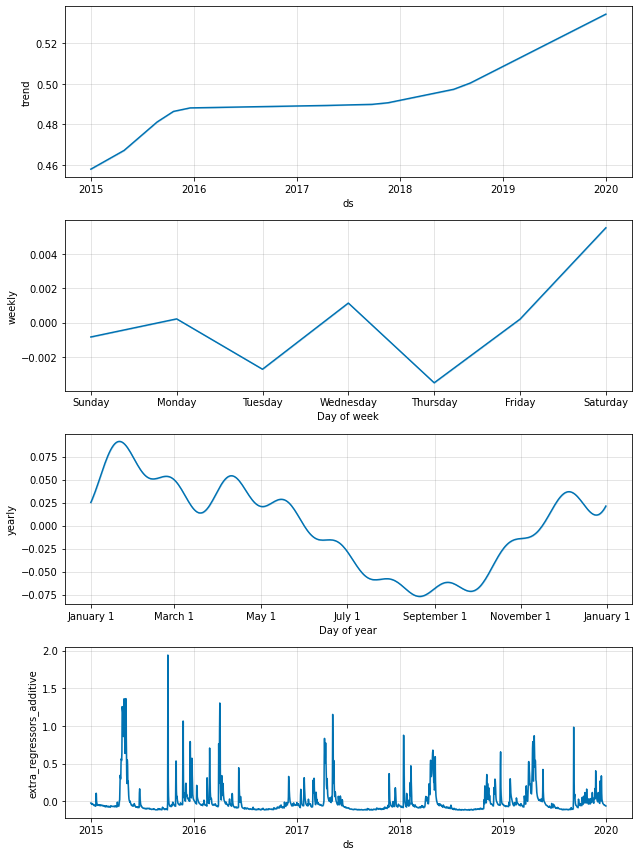

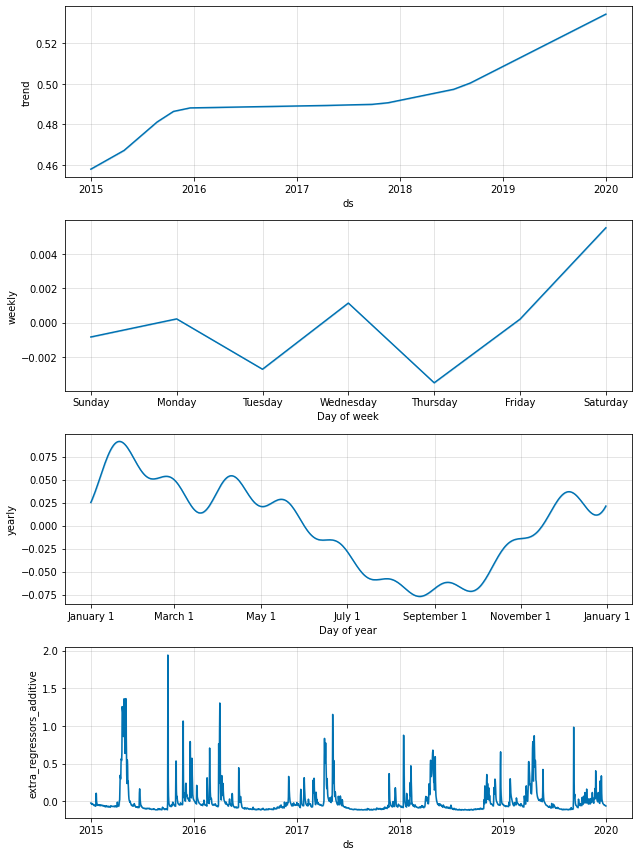

In [ ]:

model.plot_components(forecast_data)

In [ ]:
#
#from matplotlib.pylab import rcParams
#plt.style.use('fivethirtyeight')
#rcParams['figure.figsize'] = 50,20
#rcParams['font.size'] = 30
##close_prices = model.make_future_dataframe(periods=len(valid))
##orecast = model.predict(close_prices)
#
#forecast_valid = forecast_data['yhat'][1096:]
#
##plot
#df_test['Predictions'] = 0
#df_test['Predictions'] = forecast_valid.values
#
#plt.plot(df_train['y'],label="Training Set")
#plt.plot(df_test['y'],label="Testing Set")
#plt.plot(df_test['Predictions'],label="Predictions")
#plt.xlabel("Date")
#plt.ylabel('Level (m)')
#plt.legend()
#plt.show()

In [ ]:
import math
import numpy as np
def calculate_rms(preds):
    a=np.array(df_test['y'])-preds
    b=np.power(a,2)
    c=np.nansum(b)
    d=len(b)
    
    mean=c/d
    return(math.sqrt(mean))

In [ ]:
forecast_valid = forecast_data['yhat'][1096:]
df_test['Predictions'] = 0
df_test['Predictions'] = forecast_valid.values
calculate_rms(forecast_valid.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.04936430048254091

In [ ]:
pip install hydroeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import hydroeval as he

In [ ]:
nse = he.evaluator(he.nse, df_test["Predictions"], df_test["y"])

In [ ]:
print(nse)

[0.58810638]


In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Mean Square Error:{:.4f}'.format(mse))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    

evaluate_prediction(df_test["Predictions"],df_test["y"],'prophet')
print(nse)

prophet:
Mean Absolute Error: 0.0349
Mean Square Error:0.0024
Root Mean Square Error: 0.0494
[0.58810638]


In [ ]:
#df_test['Predictions'].to_csv("propheet")